In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [2]:
df = pd.read_csv('german_credit_data.csv')
df.head()


,status_account,month_duration,credit_history,purpose,credit_amount,status_savings,years_employment,payment_to_income_ratio,status_and_sex,secondary_obligor,...,collateral,age,other_installment_plans,housing,n_credits,job,n_guarantors,telephone,is_foreign_worker,target
0,< 0 DM,6,critical account/ other credits existing (not ...,radio/television,1169,unknown/ no savings account,>= 7 years,4,male : single,none,...,none,67,none,own,2,skilled employee/ official,1,"yes, registered under the customers name",yes,good
1,0 to < 200 DM,48,existing credits paid back duly till now,radio/television,5951,< 100 DM,1 to < 4 years,2,female : divorced/separated/married,none,...,none,22,none,own,1,skilled employee/ official,1,none,yes,bad
2,no checking account,12,critical account/ other credits existing (not ...,education,2096,< 100 DM,4 to < 7 years,2,male : single,none,...,none,49,none,own,1,unskilled - resident,2,none,yes,good
3,< 0 DM,42,existing credits paid back duly till now,furniture/equipment,7882,< 100 DM,4 to < 7 years,2,male : single,guarantor,...,car,45,none,for free,1,skilled employee/ official,2,none,yes,good
4,< 0 DM,24,delay in paying off in the past,car (new),4870,< 100 DM,1 to < 4 years,3,male : single,none,...,savings agreement/life insurance,53,none,for free,2,skilled employee/ official,2,none,yes,bad


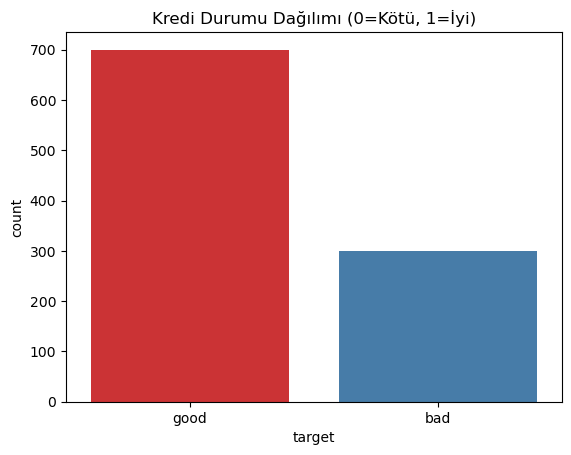

In [3]:
sns.countplot(x='target', data=df, palette='Set1')
plt.title("Kredi Durumu Dağılımı (0=Kötü, 1=İyi)")
plt.show()


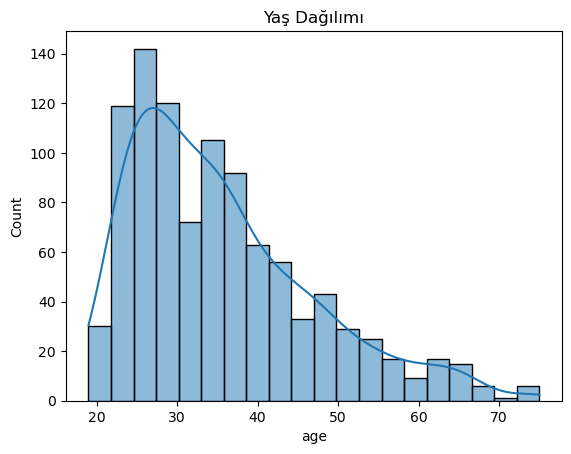

In [4]:
sns.histplot(df['age'], bins=20, kde=True)
plt.title("Yaş Dağılımı")
plt.show()


In [5]:
X = df.drop('target', axis=1)
y = df['target']


In [6]:
X = pd.get_dummies(X, drop_first=True)


In [7]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.20, random_state=42
)


In [8]:
from sklearn.tree import DecisionTreeClassifier

dtree = DecisionTreeClassifier(max_depth=4, random_state=42)
dtree.fit(X_train, y_train)


DecisionTreeClassifier(max_depth=4, random_state=42)

In [9]:
predictions = dtree.predict(X_test)


In [10]:
from sklearn.metrics import classification_report, confusion_matrix

print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))


[[ 39  20]
 [ 35 106]]
              precision    recall  f1-score   support

         bad       0.53      0.66      0.59        59
        good       0.84      0.75      0.79       141

    accuracy                           0.73       200
   macro avg       0.68      0.71      0.69       200
weighted avg       0.75      0.72      0.73       200



In [ ]:
plt.figure(figsize=(25,15))
tree.plot_tree(
    dtree,
    feature_names=list(X.columns),
    class_names=['Bad Credit', 'Good Credit'],
    filled=True
)
plt.show()



InvalidParameterError: The 'feature_names' parameter of plot_tree must be an instance of 'list' or None. Got Index(['month_duration', 'credit_amount', 'payment_to_income_ratio',
       'residence_since', 'age', 'n_credits', 'n_guarantors',
       'status_account_< 0 DM', 'status_account_>= 200 DM',
       'status_account_no checking account',
       'credit_history_critical account/ other credits existing (not at this bank)',
       'credit_history_delay in paying off in the past',
       'credit_history_existing credits paid back duly till now',
       'credit_history_no credits taken/ all credits paid back duly',
       'purpose_car (new)', 'purpose_car (used)',
       'purpose_domestic appliances', 'purpose_education',
       'purpose_furniture/equipment', 'purpose_others',
       'purpose_radio/television', 'purpose_repairs', 'purpose_retraining',
       'status_savings_500 to < 1000 DM', 'status_savings_< 100 DM',
       'status_savings_>= 1000 DM',
       'status_savings_unknown/ no savings account',
       'years_employment_4 to < 7 years', 'years_employment_< 1 year',
       'years_employment_>= 7 years', 'years_employment_unemployed',
       'status_and_sex_male : divorced/separated',
       'status_and_sex_male : married/widowed', 'status_and_sex_male : single',
       'secondary_obligor_guarantor', 'secondary_obligor_none',
       'collateral_none', 'collateral_real estate',
       'collateral_savings agreement/life insurance',
       'other_installment_plans_none', 'other_installment_plans_stores',
       'housing_own', 'housing_rent', 'job_skilled employee/ official',
       'job_unemployed/ unskilled - non-resident', 'job_unskilled - resident',
       'telephone_yes, registered under the customers name',
       'is_foreign_worker_yes'],
      dtype='object') instead.

<Figure size 2500x1500 with 0 Axes>